In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset,DataLoader

In [3]:
df = pd.read_csv(r"./Aleppo2017_processed.csv",encoding='utf-8')
df.head(10)

,2015-03-30 00:02:00,263,262.0,2015-03-30
0,2015-03-30 00:07:00,263,252.0,2015-03-30
1,2015-03-30 00:12:00,263,263.0,2015-03-30
2,2015-03-30 00:17:00,263,259.0,2015-03-30
3,2015-03-30 00:22:00,263,249.0,2015-03-30
4,2015-03-30 00:27:00,263,240.0,2015-03-30
5,2015-03-30 00:32:00,263,232.0,2015-03-30
6,2015-03-30 00:37:00,263,227.0,2015-03-30
7,2015-03-30 00:42:00,263,230.0,2015-03-30
8,2015-03-30 00:47:00,263,240.0,2015-03-30
9,2015-03-30 00:52:00,263,248.0,2015-03-30


In [3]:
ID = df['id'].value_counts().index
pd.set_option('display.max_rows',100)
print(ID)

Index([263,  77, 193, 277, 229, 245, 155, 251, 111, 164,
       ...
       128, 264, 186, 162, 249,  39,  52, 266, 223, 289],
      dtype='int64', name='id', length=226)


In [5]:
#获取数据

# 创建空的DataFrame
total_data = {'id': [], 'gl': [],'month':[],'day':[],'hour':[],'minute':[],'weekday':[],'target':[]}
total_data = pd.DataFrame(total_data)

for i in ID[:100]:
    if df[df['id']== i].shape[0] >= 50000:
        print("开始获取id为{}的被试数据：---------------------------------".format(i))
        data = df[df['id']== i].copy() 

        #将time列设成date数据类型
        data['time'] = pd.to_datetime(data['time'])

        #按照时间排序
        data = data.sort_values(by='time') 

        #提取月为单独的一列
        data['month'] = data['time'].dt.month

        #提取日为单独的一列
        data['day'] = data['time'].dt.day

        #提取小时为单独的一列
        data['hour'] = data['time'].dt.hour

        #提取分钟为单独的一列
        data['minute'] = data['time'].dt.minute

        # 提取周几（0表示星期一，1表示星期二，依此类推）
        data['weekday'] = data['time'].dt.dayofweek

        data = data.set_index('time')

        data['target'] = data['gl'].shift(-1)

        #使用了shift函数，在最后必然是有缺失值的，这里去掉缺失值所在行
        data = data.dropna()[:50000]           

        data = data.astype(np.float32) # 修改数据类型

        #整合全部数据
        total_data = pd.concat([total_data, data], ignore_index=True)

开始获取id为263的被试数据：---------------------------------
开始获取id为77的被试数据：---------------------------------
开始获取id为193的被试数据：---------------------------------
开始获取id为277的被试数据：---------------------------------
开始获取id为229的被试数据：---------------------------------
开始获取id为245的被试数据：---------------------------------
开始获取id为155的被试数据：---------------------------------
开始获取id为251的被试数据：---------------------------------
开始获取id为111的被试数据：---------------------------------
开始获取id为164的被试数据：---------------------------------
开始获取id为228的被试数据：---------------------------------
开始获取id为227的被试数据：---------------------------------
开始获取id为68的被试数据：---------------------------------
开始获取id为130的被试数据：---------------------------------
开始获取id为271的被试数据：---------------------------------
开始获取id为23的被试数据：---------------------------------
开始获取id为232的被试数据：---------------------------------
开始获取id为95的被试数据：---------------------------------
开始获取id为7的被试数据：---------------------------------
开始获取id为137的被试数据：---------------------------------
开始获取id

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  
sel_col = ['id','month','day','hour','minute','weekday','gl','target']
for col in sel_col:                           
    total_data[col] = scaler.fit_transform(total_data[col].values.reshape(-1,1))

In [7]:
ID1 = total_data['id'].value_counts().index
pd.set_option('display.max_rows',100)
print(len(ID1))

100


In [8]:
total_data

,id,gl,month,day,hour,minute,weekday,target
0,0.857143,-0.796134,-1.000000,-0.8,-0.739130,-0.627119,1.0,-0.803163
1,0.857143,-0.803163,-1.000000,-0.8,-0.739130,-0.457627,1.0,-0.813708
2,0.857143,-0.813708,-1.000000,-0.8,-0.739130,-0.288136,1.0,-0.817223
3,0.857143,-0.817223,-1.000000,-0.8,-0.739130,-0.118644,1.0,-0.820738
4,0.857143,-0.820738,-1.000000,-0.8,-0.739130,0.050847,1.0,-0.824253
...,...,...,...,...,...,...,...,...
4999995,0.985714,-0.223199,0.636364,-0.8,0.304348,-0.118644,1.0,-0.272408
4999996,0.985714,-0.272408,0.636364,-0.8,0.304348,0.050847,1.0,-0.321617
4999997,0.985714,-0.321617,0.636364,-0.8,0.304348,0.220339,1.0,-0.360281
4999998,0.985714,-0.360281,0.636364,-0.8,0.304348,0.389830,1.0,-0.377856


In [9]:
#窗口划分
# 创建两个列表，用来存储数据的特征和标签
total_data_feat, total_data_target = [],[]

# 设每条数据序列有24组数据
seq = 24
for i in ID1:
    data = total_data[total_data['id'] == i]
    print("当前被试(id == {})的数据集长度：".format(i),data.shape)
    
    # 创建两个列表，用来存储当前被试的数据特征和标签
    data_feat, data_target = [],[]
    for index in range(len(data) - seq):
        # 构建特征集
        data_feat.append(data[['id','month','day','hour','minute','weekday','gl']][index: index + seq].values)
        # 构建target集
        data_target.append(data['target'].iloc[index + seq-1])
        
    
    # 将特征集和标签集整理成numpy数组
    data_feat = np.array(data_feat)
    data_target = np.array(data_target)
    total_data_feat.append(data_feat)
    total_data_target.append(data_target)
    
total_data_feat = np.array(total_data_feat)
total_data_target = np.array(total_data_target)

当前被试(id == 0.8571428060531616)的数据集长度： (50000, 8)
当前被试(id == -0.7571429014205933)的数据集长度： (50000, 8)
当前被试(id == 0.2999999523162842)的数据集长度： (50000, 8)
当前被试(id == 0.5357142686843872)的数据集长度： (50000, 8)
当前被试(id == -0.4928571581840515)的数据集长度： (50000, 8)
当前被试(id == -0.6428571939468384)的数据集长度： (50000, 8)
当前被试(id == 0.5214285850524902)的数据集长度： (50000, 8)
当前被试(id == 0.5428571701049805)的数据集长度： (50000, 8)
当前被试(id == -0.2142857313156128)的数据集长度： (50000, 8)
当前被试(id == -0.6857143044471741)的数据集长度： (50000, 8)
当前被试(id == -0.9214285612106323)的数据集长度： (50000, 8)
当前被试(id == -0.06428569555282593)的数据集长度： (50000, 8)
当前被试(id == -0.5857143402099609)的数据集长度： (50000, 8)
当前被试(id == -0.4714285731315613)的数据集长度： (50000, 8)
当前被试(id == -0.6928571462631226)的数据集长度： (50000, 8)
当前被试(id == -0.7857142686843872)的数据集长度： (50000, 8)
当前被试(id == -0.6357142925262451)的数据集长度： (50000, 8)
当前被试(id == 0.9642857313156128)的数据集长度： (50000, 8)
当前被试(id == -0.050000011920928955)的数据集长度： (50000, 8)
当前被试(id == 0.9357142448425293)的数据集长度： (50000, 8)
当前被试

In [10]:
total_data_feat = total_data_feat.reshape(-1,24,7)
total_data_target = total_data_target.reshape(-1)
print(total_data_feat.shape)
print(total_data_target.shape)

(4997600, 24, 7)
(4997600,)


In [11]:
# 这里按照8:2的比例划分训练集和测试集
test_set_size = int(np.round(0.0001 * total_data_feat.shape[0]))  # np.round(1)是四舍五入，
train_size = total_data_feat.shape[0] - (test_set_size) 
print(test_set_size)  # 输出测试集大小
print(train_size)     # 输出训练集大小

500
4997100


In [12]:
trainX = torch.from_numpy(total_data_feat[:train_size,:,:].reshape(-1,seq,7)).type(torch.Tensor)   
# 这里第一个维度自动确定，我们认为其为batch_size，因为在LSTM类的定义中，设置了batch_first=True
testX  = torch.from_numpy(total_data_feat[train_size:,:,:].reshape(-1,seq,7)).type(torch.Tensor)
trainY = torch.from_numpy(total_data_target[:train_size]).type(torch.Tensor)
testY  = torch.from_numpy(total_data_target[train_size:]).type(torch.Tensor)

In [13]:
print('x_train.shape = ',trainX.shape)
print('y_train.shape = ',trainY.shape)
print('x_test.shape = ',testX.shape)
print('y_test.shape = ',testY.shape)

x_train.shape =  torch.Size([4997100, 24, 7])
y_train.shape =  torch.Size([4997100])
x_test.shape =  torch.Size([500, 24, 7])
y_test.shape =  torch.Size([500])


In [14]:
batch_size=2048
train = TensorDataset(trainX,trainY)
test = TensorDataset(testX,testY)
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [15]:
import torch.nn as nn

input_dim = 7      # 数据的特征数
hidden_dim = 64    # 隐藏层的神经元个数
num_layers = 2     # LSTM的层数
output_dim = 1     # 预测值的特征数

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # Readout layer 在LSTM后再加一个全连接层，因为是回归问题，所以不能在线性层后加激活函数
        # self.cnn = nn.Conv1d(input_dim, hidden_dim, num_layers)
        self.fc = nn.Linear(hidden_dim, output_dim) 

    def forward(self, x):
        # Initialize hidden state with zeros   
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().cuda()
        # 这里x.size(0)就是batch_size

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().cuda()

        # One time step
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        
#         print(out.shape)
        out = self.fc(out[:,-1,:]) 
#         print(out.shape)
        return out


In [16]:
device =  torch.device("cuda:0")
# 实例化模型
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model = model.to(device)

# 定义优化器和损失函数
optimiser = torch.optim.Adam(model.parameters(), lr=0.001) # 使用Adam优化算法
loss_fn = torch.nn.MSELoss(reduction='mean')             # 使用均方差作为损失函数
loss_fn = loss_fn.to(device)

# 设定数据遍历次数
num_epochs = 300

# 打印模型结构
print(model)

LSTM(
  (lstm): LSTM(7, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [17]:
# train model

# 记录训练次数
total_train_step = 0
# 记录测试次数
total_test_step = 0    

for t in range(num_epochs):
    print("--------------------第{}轮训练开始----------------------".format(t+1))
    model.train()
    for data in train_loader:
        feats, tars = data
        feats = feats.to(device)
        tars = tars.to(device)
        
        y_train_pred = model(feats)

        loss = loss_fn(y_train_pred.squeeze(-1), tars)
        
        # Zero out gradient, else they will accumulate between epochs 将梯度归零
        optimiser.zero_grad()

        # Backward pass
        loss.backward()

        # Update parameters
        optimiser.step()

        total_train_step += 1
        
        if total_train_step % 200 == 0:
            print("训练次数：{}, Loss: {}".format(total_train_step,loss.item()))
    
    
    #测试步骤开始
    total_test_loss = 0
    total_accuracy = 0
    model.eval()
    with torch.no_grad():
        print("**********开始本轮测试**********".format(t+1))
        for data in test_loader:
            feats,tars = data
            feats = feats.cuda()
            tars = tars.cuda()

            y_train_pred = model(feats)
            
            loss = loss_fn(y_train_pred.squeeze(-1),tars)
            
            total_test_loss += loss.item()
            
    print("第 {} 轮训练在整体测试集上的Loss: {}".format(t+1,total_test_loss))

    total_test_step += 1

    #保存每一轮训练的模型
    torch.save(model,"./saved_model/allen_{}.pth".format(t))
    print("allen_{}.pth 模型已保存".format(t))

--------------------第1轮训练开始----------------------
训练次数：200, Loss: 0.007012165617197752
训练次数：400, Loss: 0.00216944282874465
训练次数：600, Loss: 0.0013969613937661052
训练次数：800, Loss: 0.0010115469340234995
训练次数：1000, Loss: 0.0005704131326638162
训练次数：1200, Loss: 0.0005974583327770233
训练次数：1400, Loss: 0.0007647961028851569
训练次数：1600, Loss: 0.0003567205276340246
训练次数：1800, Loss: 0.0005344834644347429
训练次数：2000, Loss: 0.0005032862536609173
训练次数：2200, Loss: 0.0006719500524923205
训练次数：2400, Loss: 0.0007483490044251084
**********开始本轮测试**********
第 1 轮训练在整体测试集上的Loss: 0.0006143481587059796
allen_0.pth 模型已保存
--------------------第2轮训练开始----------------------
训练次数：2600, Loss: 0.0005260141915641725
训练次数：2800, Loss: 0.0006268656579777598
训练次数：3000, Loss: 0.0004766866913996637
训练次数：3200, Loss: 0.0004423349746502936
训练次数：3400, Loss: 0.0004171102773398161
训练次数：3600, Loss: 0.00035554979695007205
训练次数：3800, Loss: 0.00018200483464170247
训练次数：4000, Loss: 0.0009859870187938213
训练次数：4200, Loss: 0.000777586363255977

训练次数：32000, Loss: 0.0003848549094982445
训练次数：32200, Loss: 0.0002640164166223258
训练次数：32400, Loss: 0.00046795172966085374
训练次数：32600, Loss: 0.000809715420473367
训练次数：32800, Loss: 0.0006286392454057932
训练次数：33000, Loss: 0.00041723635513335466
训练次数：33200, Loss: 0.00018848886247724295
训练次数：33400, Loss: 0.00016246503219008446
训练次数：33600, Loss: 0.0015659367199987173
训练次数：33800, Loss: 0.0005190036026760936
训练次数：34000, Loss: 0.00026196325779892504
**********开始本轮测试**********
第 14 轮训练在整体测试集上的Loss: 0.0003247222339268774
allen_13.pth 模型已保存
--------------------第15轮训练开始----------------------
训练次数：34200, Loss: 0.0003112480044364929
训练次数：34400, Loss: 0.0002057740348391235
训练次数：34600, Loss: 0.0003776045050472021
训练次数：34800, Loss: 0.0001587437145644799
训练次数：35000, Loss: 0.0003644039388746023
训练次数：35200, Loss: 0.0005584654281847179
训练次数：35400, Loss: 0.00019011899712495506
训练次数：35600, Loss: 0.0008960955310612917
训练次数：35800, Loss: 0.0005119073903188109
训练次数：36000, Loss: 0.0005315024754963815
训练次数：36200, Lo

训练次数：63600, Loss: 0.0003726415161509067
训练次数：63800, Loss: 0.0005064529250375926
训练次数：64000, Loss: 0.0004149358719587326
训练次数：64200, Loss: 0.0003009925421793014
训练次数：64400, Loss: 0.0003609378181863576
训练次数：64600, Loss: 0.00031448714435100555
训练次数：64800, Loss: 0.00011975887173321098
训练次数：65000, Loss: 0.0008475560462102294
训练次数：65200, Loss: 0.0006295811617746949
训练次数：65400, Loss: 0.0002156203263439238
训练次数：65600, Loss: 0.00020270470122341067
训练次数：65800, Loss: 0.00021968051441945136
**********开始本轮测试**********
第 27 轮训练在整体测试集上的Loss: 0.0003091346297878772
allen_26.pth 模型已保存
--------------------第28轮训练开始----------------------
训练次数：66000, Loss: 0.0008655978599563241
训练次数：66200, Loss: 0.0003465238551143557
训练次数：66400, Loss: 0.00022072182036936283
训练次数：66600, Loss: 0.0003008672792930156
训练次数：66800, Loss: 0.0003839879063889384
训练次数：67000, Loss: 0.00019240850815549493
训练次数：67200, Loss: 0.00034046557266265154
训练次数：67400, Loss: 0.0006110775284469128
训练次数：67600, Loss: 0.00036190898390486836
训练次数：67800,

训练次数：95200, Loss: 0.0002743343939073384
训练次数：95400, Loss: 0.0001957621716428548
训练次数：95600, Loss: 0.0003419344429858029
训练次数：95800, Loss: 0.00015427666949108243
训练次数：96000, Loss: 0.00033830199390649796
训练次数：96200, Loss: 0.00039279775228351355
训练次数：96400, Loss: 0.00018693241872824728
训练次数：96600, Loss: 0.0005624020704999566
训练次数：96800, Loss: 0.0005124352173879743
训练次数：97000, Loss: 0.0005305841914378107
训练次数：97200, Loss: 0.00035337841836735606
训练次数：97400, Loss: 0.00030271365540102124
训练次数：97600, Loss: 0.0003032879321835935
**********开始本轮测试**********
第 40 轮训练在整体测试集上的Loss: 0.00030446978053078055
allen_39.pth 模型已保存
--------------------第41轮训练开始----------------------
训练次数：97800, Loss: 0.0004640611005015671
训练次数：98000, Loss: 0.00024005754676181823
训练次数：98200, Loss: 0.00018682703375816345
训练次数：98400, Loss: 0.0002370829024584964
训练次数：98600, Loss: 0.00024158961605280638
训练次数：98800, Loss: 0.0002998350828420371
训练次数：99000, Loss: 0.0005477335071191192
训练次数：99200, Loss: 0.00013144253171049058
训练次数：994

训练次数：126800, Loss: 0.00018921736045740545
**********开始本轮测试**********
第 52 轮训练在整体测试集上的Loss: 0.0003010443178936839
allen_51.pth 模型已保存
--------------------第53轮训练开始----------------------
训练次数：127000, Loss: 0.0008630017400719225
训练次数：127200, Loss: 0.0003356859087944031
训练次数：127400, Loss: 0.00019141013035550714
训练次数：127600, Loss: 0.00029673255630768836
训练次数：127800, Loss: 0.0003788071917369962
训练次数：128000, Loss: 0.0001921350631164387
训练次数：128200, Loss: 0.0003361912094987929
训练次数：128400, Loss: 0.0006072582909837365
训练次数：128600, Loss: 0.0003245894913561642
训练次数：128800, Loss: 0.00010484703670954332
训练次数：129000, Loss: 0.0002540580171626061
训练次数：129200, Loss: 0.0008559508714824915
**********开始本轮测试**********
第 53 轮训练在整体测试集上的Loss: 0.00029936523060314357
allen_52.pth 模型已保存
--------------------第54轮训练开始----------------------
训练次数：129400, Loss: 0.00022669494501315057
训练次数：129600, Loss: 0.0003528099914547056
训练次数：129800, Loss: 0.00024493192904628813
训练次数：130000, Loss: 0.00044922431698068976
训练次数：130200, 

KeyboardInterrupt: 

In [55]:
model = torch.load(r"./saved_model/allen_22.pth")

In [48]:
y_test_pred = model(testX[100:200,:,:].cuda())
y_test_pred.shape

torch.Size([100, 1])

In [49]:
#被试1预测50点 真实值和标签的MSE
mse_loss = loss_fn(y_test_pred.squeeze(-1), testY[100:200].to(device))
rmse_loss = torch.sqrt(mse_loss)
print(rmse_loss)

tensor(0.0178, device='cuda:0', grad_fn=<SqrtBackward0>)


In [50]:
# 将数据转移到CPU并更改数据类型为numpy.ndarray
pred_value = y_test_pred.cpu().detach().numpy().flatten()
true_value = testY[100:200].numpy()  
pred_value = scaler.inverse_transform(pred_value.reshape(-1, 1))
true_value = scaler.inverse_transform(true_value.reshape(-1, 1))

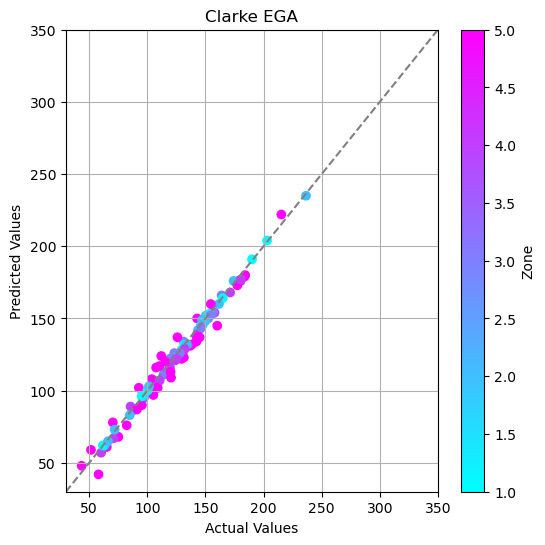

In [52]:
import matplotlib.pyplot as plt

# 生成示例数据，实际观测值和预测值
actual_values = pred_value
predicted_values = true_value

# 计算Clarke EGA图中的区域
def clarke_ega_region(actual, predicted):
    abs_diff = np.abs(predicted - actual)
    zones = np.zeros_like(abs_diff, dtype=int)
    zones[(abs_diff <= 1)] = 1
    zones[(abs_diff <= 2) & (abs_diff >1)] = 2
    zones[(abs_diff <= 3) & (abs_diff > 2)] = 3
    zones[(abs_diff <= 4) & (abs_diff > 3)] = 4
    zones[(abs_diff > 4)] = 5
    return zones

zones = clarke_ega_region(actual_values, predicted_values)

# 绘制Clarke EGA图
plt.figure(figsize=(6, 6))
plt.scatter(actual_values, predicted_values, c=zones, cmap='cool', marker='o')
plt.plot([30,350], [30, 350], color='gray', linestyle='--')
plt.xlim(30, 350)
plt.ylim(30, 350)
plt.title("Clarke EGA")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.grid()
plt.colorbar(label="Zone")


In [36]:
#被试1预测50点 真实值和标签的MSE
mse_loss = loss_fn(y_test_pred.squeeze(-1), testY[:200].to(device))
rmse_loss = torch.sqrt(mse_loss)
print(rmse_loss)

tensor(0.0128, device='cuda:0', grad_fn=<SqrtBackward0>)


In [37]:
import torch
import torch.nn.functional as F

# 使用MAE损失函数计算损失
mae_loss = F.l1_loss(y_test_pred.squeeze(-1), testY[:200].to(device))
mae_loss

tensor(0.0083, device='cuda:0', grad_fn=<MeanBackward0>)

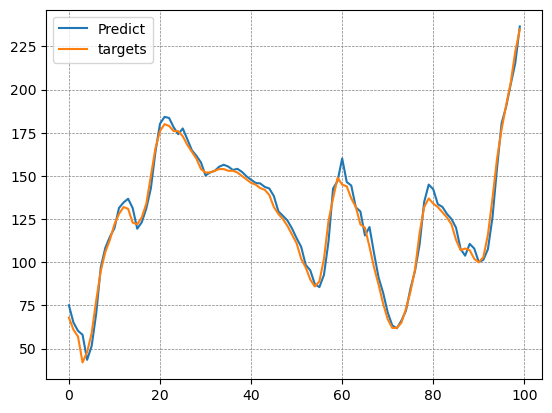

In [51]:
# 绘制predict 和 targets 的对比图
import matplotlib.pyplot as plt
# pred_value = scaler.inverse_transform(pred_value.reshape(-1, 1))
# true_value = scaler.inverse_transform(true_value.reshape(-1, 1))

plt.plot(pred_value, label="Predict")    # 预测值
plt.plot(true_value, label="targets")    # 真实值
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [45]:
# 统计一下训练数据的前10000个窗口在模型上的损失值
y_train_pred = model(trainX[:10000,:,:].cuda())
print(y_train_pred.shape)
print(trainY[:10000].shape)
loss_fn(y_train_pred.squeeze(-1).cpu().detach(), trainY[:10000]).item()

torch.Size([10000, 1])
torch.Size([10000])


0.0004577294457703829

In [62]:
np.random.choice([0, 1], size=(7, 288, 12), p=[0.1, 0.9])

(7, 288, 12)

In [46]:
y_test_pred = model(trainX[-1,:,:].unsqueeze(0).cuda())
y_test_pred = y_test_pred.cpu().detach().numpy().flatten()

In [47]:
pred_value = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
true_value = scaler.inverse_transform(trainY[-1:].reshape(-1, 1))
pred_value

array([[179.98097]], dtype=float32)

In [ ]:
# 想使用训练集的最后一个窗口预测训练集的下一个数据，再将窗口第一个数据弹出，将预测值插入窗口末尾组成一个新窗口。但是模型的输出是单个血糖值
# 缺了一些时间特征。要想实现真正的预测（有误差积累的预测）必须改变模型，使模型输出一个样本。
result = []
for i in range(50):
    x = trainX[-1,:,i:].unsqueeze(0).cuda()
    y = model(x)
    x = trainX[-1,:,:-1]